In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx
from Ames_Functions import *
from shapely.geometry import Point
pd.set_option("display.max_columns", None)

In [36]:
df_house_2021 = load_state_pkl()["df_RE_latlong2021"][0]
df_house_2019 = load_state_pkl()["df_RE_latlong2019"][0]
df_biz = pd.read_csv("df_EssentialLatLong_v2.csv")
df_shp = gpd.read_file("Ames_Precinct_Boundaries/Ames_-_Precincts_2.shp") #original
df_shpGIS = gpd.read_file("roads_shapefile/roads.shp")
df_feature_all2021 = load_state_pkl()['df_house2021_after_feature_engineering'][0]
df_feature_all2019 = load_state_pkl()['df_house2019_after_feature_engineering'][0]

In [14]:
load_state_pkl()['df_house2021_after_feature_engineering'][0]

Rcrd_Yr  InstOne_Yr  TtlVal_AsrYr   LotArea  YrBuilt  TtlBsmtSF  \
SaleID                                                                    
2        2021.0      2021.0          5700   12493.0      0.0        0.0   
3        2021.0      2021.0        385100    9595.0   2020.0     1487.0   
18       2021.0      2021.0        422300   13596.0   2020.0     1545.0   
19       2021.0      2021.0        274400   10890.0      0.0        0.0   
20       2021.0      2021.0        294000   10842.0      0.0        0.0   
...         ...         ...           ...       ...      ...        ...   
22743    2021.0      2021.0        177600   10776.0   1991.0      950.0   
22749    2021.0      2021.0        167300   12395.0   1984.0      864.0   
22756    2021.0      2021.0        162900   10463.0   1991.0      962.0   
22768    2021.0      2021.0        222700   10457.0   1969.0      784.0   
22888    2021.0      2021.0        178000  101059.0   1885.0      520.0   

        Fireplaces  PoolArea  GarYrBlt  Cars  GarageArea  Has_Fireplace  \
SaleID                                                                    
2              0.0       0.0       0.0   0.0         0.0              0   
3              1.0       0.0    2020.0   3.0       641.0              1   
18             1.0       0.0    2020.0   3.0       640.0              1   
19             0.0       0.0       0.0   0.0         0.0              0   
20             0.0       0.0       0.0   0.0         0.0              0   
...            ...       ...       ...   ...         ...            ...   
22743          0.0       0.0    2001.0   2.0       747.0              0   
22749          0.0       0.0    1984.0   2.0       484.0              0   
22756          0.0       0.0    1993.0   1.0       384.0              0   
22768          1.0       0.0    1969.0   2.0       898.0              1   
22888          0.0       0.0       0.0   0.0         0.0              0   

        Has_Garage  Has_Bsmt  TotalArea  TotalArea_Gar  AsbShng_Ext  \
SaleID                                                                
2                0         0        0.0            0.0            0   
3                1         1     2974.0         3615.0            0   
18               1         1     3090.0         3730.0            0   
19               0         0        0.0            0.0            0   
20               0         0        0.0            0.0            0   
...            ...       ...        ...            ...          ...   
22743            1         1     1929.0         2676.0            0   
22749            1         1     1753.0         2237.0            0   
22756            1         1     1963.0         2347.0            0   
22768            1         1     2415.0         3313.0            0   
22888            0         1     2356.0         2356.0            0   

        BrkComm_Ext  BrkFace_Ext  CemntBd_Ext  HdBoard_Ext  ImStucc_Ext  \
SaleID                                                                    
2                 0            0            0            0            0   
3                 0            0            0            0            0   
18                0            0            0            0            0   
19                0            0            0            0            0   
20                0            0            0            0            0   
...             ...          ...          ...          ...          ...   
22743             0            0            0            1            0   
22749             0            0            0            1            0   
22756             0            0            0            1            0   
22768             0            0            0            0            0   
22888             0            0            0            0            0   

        MetalSd_Ext  No_Data_Ext  Plywood_Ext  Stone_Ext  Stucco_Ext  \
SaleID                                                                 
2           

In [23]:
wm_house_dict = {}
wm_house_dict["2019"] = gpd.GeoDataFrame(df_house_2019.join(df_house_2019.apply(lambda x: Point(x.Long, x.Lat), axis = 1).rename("geometry")), crs = "epsg:4326").to_crs(epsg = 3857)
wm_house_dict["2021"] = gpd.GeoDataFrame(df_house_2021.join(df_house_2021.apply(lambda x: Point(x.Long, x.Lat), axis = 1).rename("geometry")), crs = "epsg:4326").to_crs(epsg = 3857)
df_wm_biz = gpd.GeoDataFrame(df_biz.join(df_biz.apply(lambda x: Point(x.Long, x.Lat), axis = 1).rename("geometry")), crs = "epsg:4326").to_crs(epsg = 3857)

In [37]:
df_wm = df_shp.to_crs(epsg = 3857)
df_wmGIS = df_shpGIS.to_crs(epsg = 3857)

In [47]:
cx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<ins

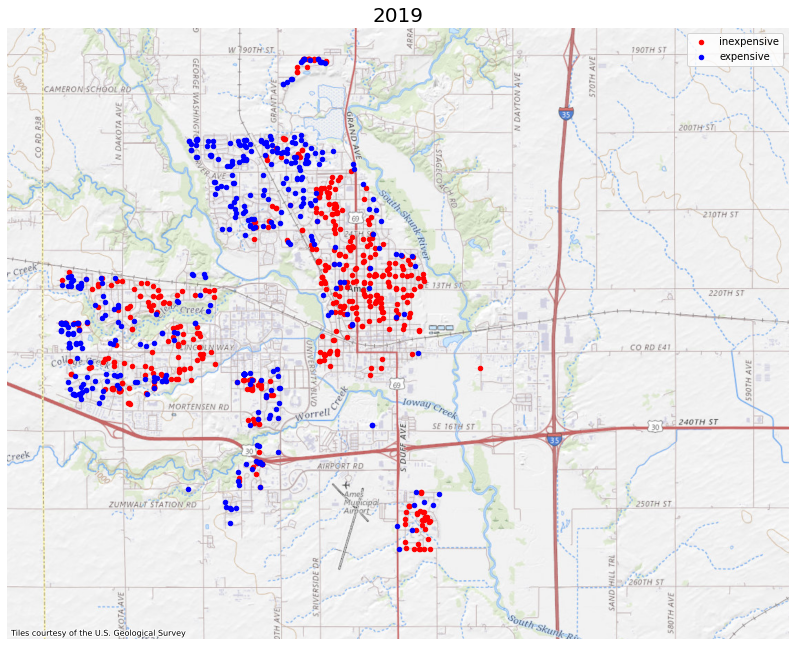

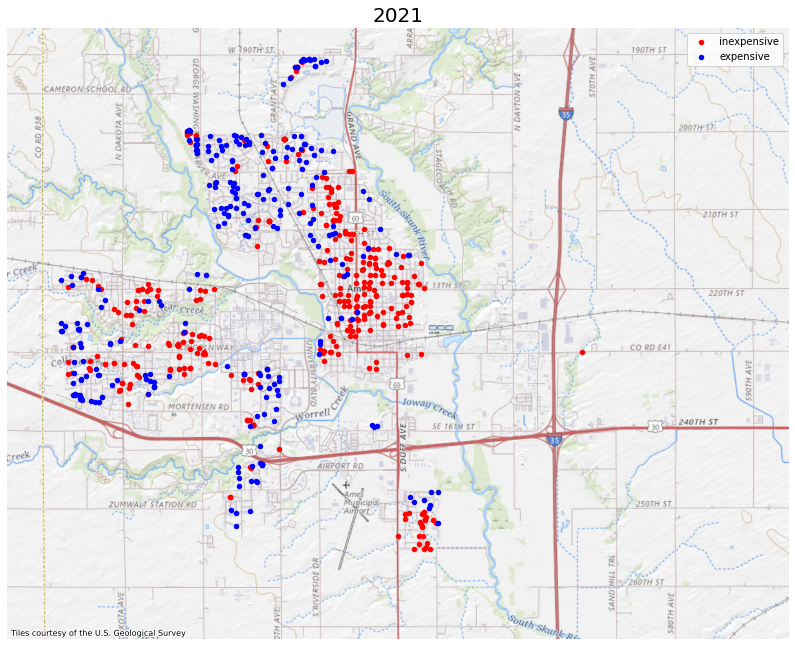

In [89]:
for year in ["2019", "2021"]:
    ax = df_wm.query("index > 0").plot(figsize = (14,14), alpha = 0)
    wm_house_dict[year].query("SalePrice <= SalePrice.mean()").plot(ax = ax, markersize = 20, color = "red", marker = "o", label = "inexpensive")
    wm_house_dict[year].query("SalePrice > SalePrice.mean()").plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "expensive")
    cx.add_basemap(ax = ax, source = cx.providers.USGS.USTopo)
    plt.axis("off")
    plt.title(year, fontdict = {"fontsize":"20"})
    plt.legend()
    plt.show()
    #df_shp.query("index >= 5").plot(ax = ax, figsize = (14,14), color = "red", edgecolor = "black")

In [ ]:
cx.providers

In [ ]:
provider =
for src in cx.providers[provider].keys():
    ax = df_wm.query("index > 0").plot(figsize = (16,16), alpha = 0)
    print(src)
    cx.add_basemap(ax = ax, source = cx.providers[provider][src])
    plt.axis("off")
    plt.show()

# OpenStreetMap:
# BZH and HOT decent resolution, not too busy
# DE decent resolution, somewhat busy

# OpenTopoMap:
# url really good resolution, slightly busy

# Esri:
# NatGeoWorldMap muted tones so house dots would stand out, not very busy
# WorldStreetMap 

# USGS
# USTopo pretty muted except for roads

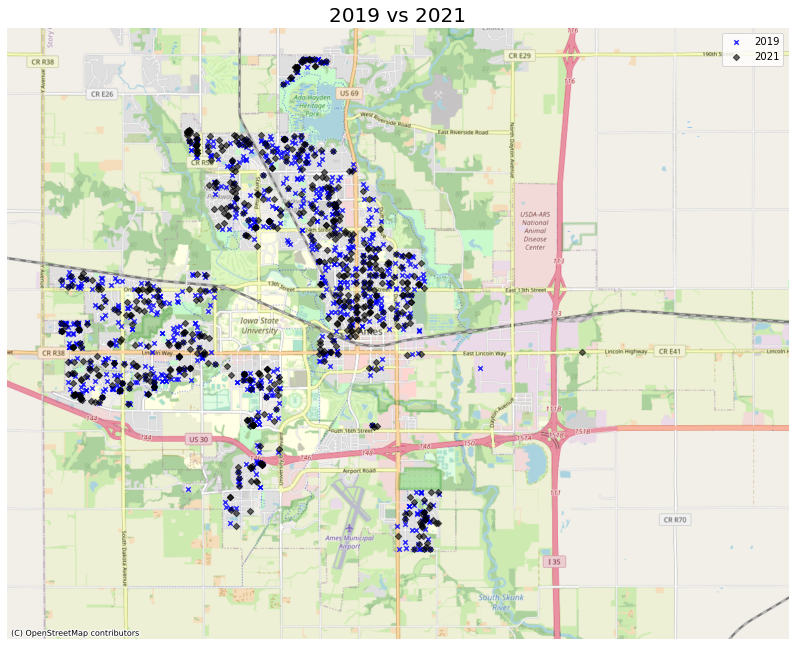

In [43]:
ax = df_wm.query("index > 0").plot(figsize = (14,14), alpha = 0)
wm_house_dict["2019"].plot(ax = ax, markersize = 20, color = "blue", marker = "x", label = "2019", alpha = 0.8)
wm_house_dict["2021"].plot(ax = ax, markersize = 20, color = "k", marker = "D", label = "2021", alpha = 0.6)
cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
plt.axis("off")
plt.title("2019 vs 2021", fontdict = {"fontsize": "20"})
plt.legend()
plt.show()

In [121]:
def plot_by_attribute (attr):
    fig,axs = plt.subplots(2,2, figsize = (18,18))
    for r,c in [(row, col) for row in range(2) for col in range(2)]:
        year = "2019" if r == 0 else "2021"
        cond = f"{attr} <= {attr}.mean()" if c == 0 else f"{attr} > {attr}.mean()"
        ax = axs[r,c]
        df_wm.query("index > 0").plot(ax = ax, alpha = 0)
        wm_house_dict[year].query(cond).plot(ax = ax, markersize = 20, color = "red", marker = "o")
        #wm_house_dict[year].query(f"{attr} > {attr}.mean()").plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = f"{attr} above mean")
        cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
        ax.axis("off")
        ax.set_title(f"{year} : {cond}", fontdict = {"fontsize":"20"})
    #df_shp.query("index >= 5").plot(ax = ax, figsize = (14,14), color = "red", edgecolor = "black")

def plot_by_categorical_attribute (attr, year):
    attr_list = wm_house_dict[year][attr].unique()
    num_ax = attr_list.shape[0]
    fig,axs = plt.subplots(num_ax//4 + 1, 4, figsize = (25,25))
    for i,ax in enumerate(axs.ravel()): #[(row, row, 1) for row in range(num_ax)]:
        #year = "2019" if r == 0 else "2021"
        if i >= num_ax:
            ax.axis("off")
            continue
        cond = f"{attr} == \"{attr_list[i]}\""
        #ax = axs[r]
        df_wm.query("index > 0").plot(ax = ax, alpha = 0)
        wm_house_dict[year].query(cond).plot(ax = ax, markersize = 20, color = "red", marker = "o")
        #wm_house_dict[year].query(f"{attr} > {attr}.mean()").plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = f"{attr} above mean")
        cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
        ax.axis("off")
        ax.set_title(f"{year} : {cond}", fontdict = {"fontsize":"20"})
    #df_shp.query("index >= 5").plot(ax = ax, figsize = (14,14), color = "red", edgecolor = "black")

In [ ]:
wm_house_dict["2019"].select_dtypes(include = "object")["Ext1"].value_counts(normalize = True)#, wm_house_dict["2021"].select_dtypes(include = "object")["SaleCond"].unique()#.shape[0]

In [127]:
wm_house_dict["2019"].columns

Index(['SaleID', 'MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr',
       'ZngCdPr', 'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S',
       'Legal_Pr', 'SchD_S', 'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1',
       'MA_Line2', 'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr',
       'Rcrd_Mo', 'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S',
       'ImpAc_S', 'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D',
       'X2TPr_D', 'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S',
       'LndAcX1S', 'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S',
       'MilVal_S', 'AcreX_S1', 'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea',
       'ParType', 'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle',
       'Foundation', 'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating',
       'Central Air', 'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
       'PoolArea', 'GarageType', 'GarYrBlt', 'Cars', 'GarageArea',
       'YrSold_YYYY', 'MoS

In [150]:
wm_house_dict["2019"]["PoolArea"].value_counts()#.rename(columns = {"Central Air": "CentralAir"}, inplace = True)

0.0      895
648.0      3
800.0      2
576.0      1
Name: PoolArea, dtype: int64

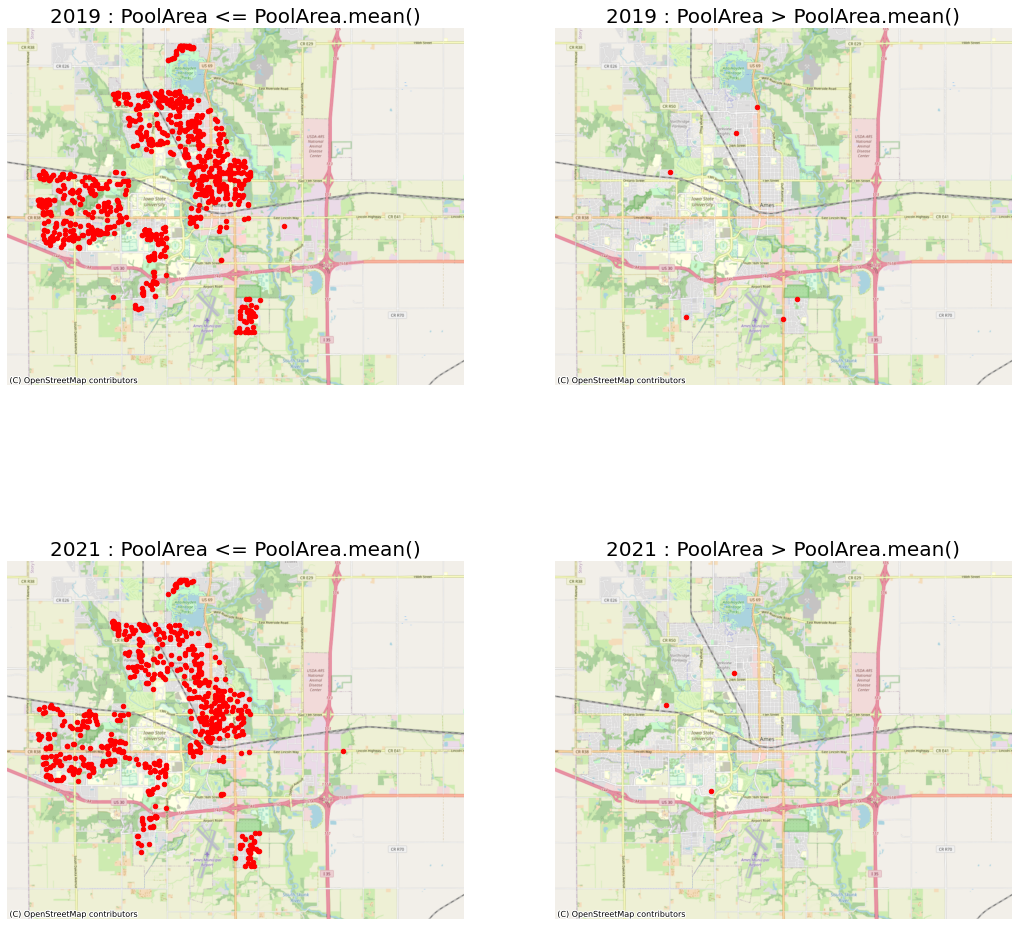

In [151]:
plot_by_attribute("PoolArea")

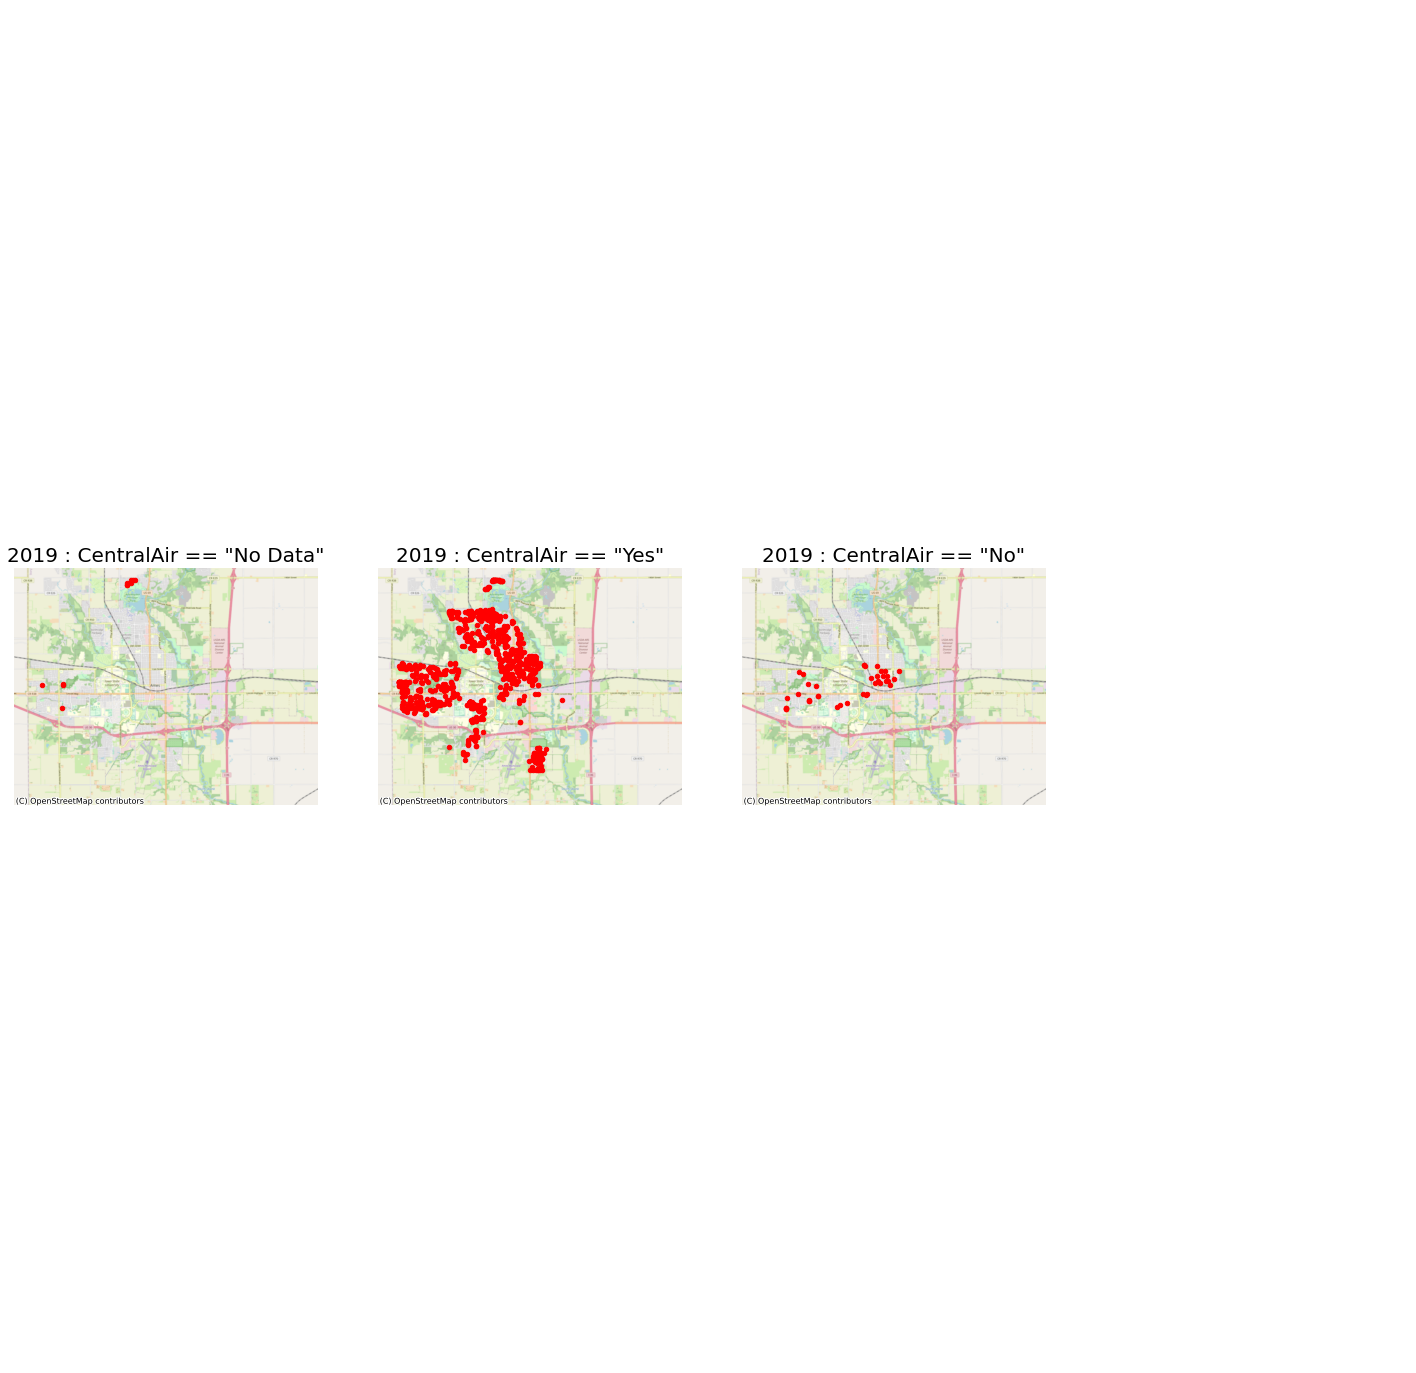

In [147]:
plot_by_categorical_attribute("", "2019")

In [ ]:
#df_wm_biz.eval("biz_num = index + 1", inplace = True)
df_wm_biz

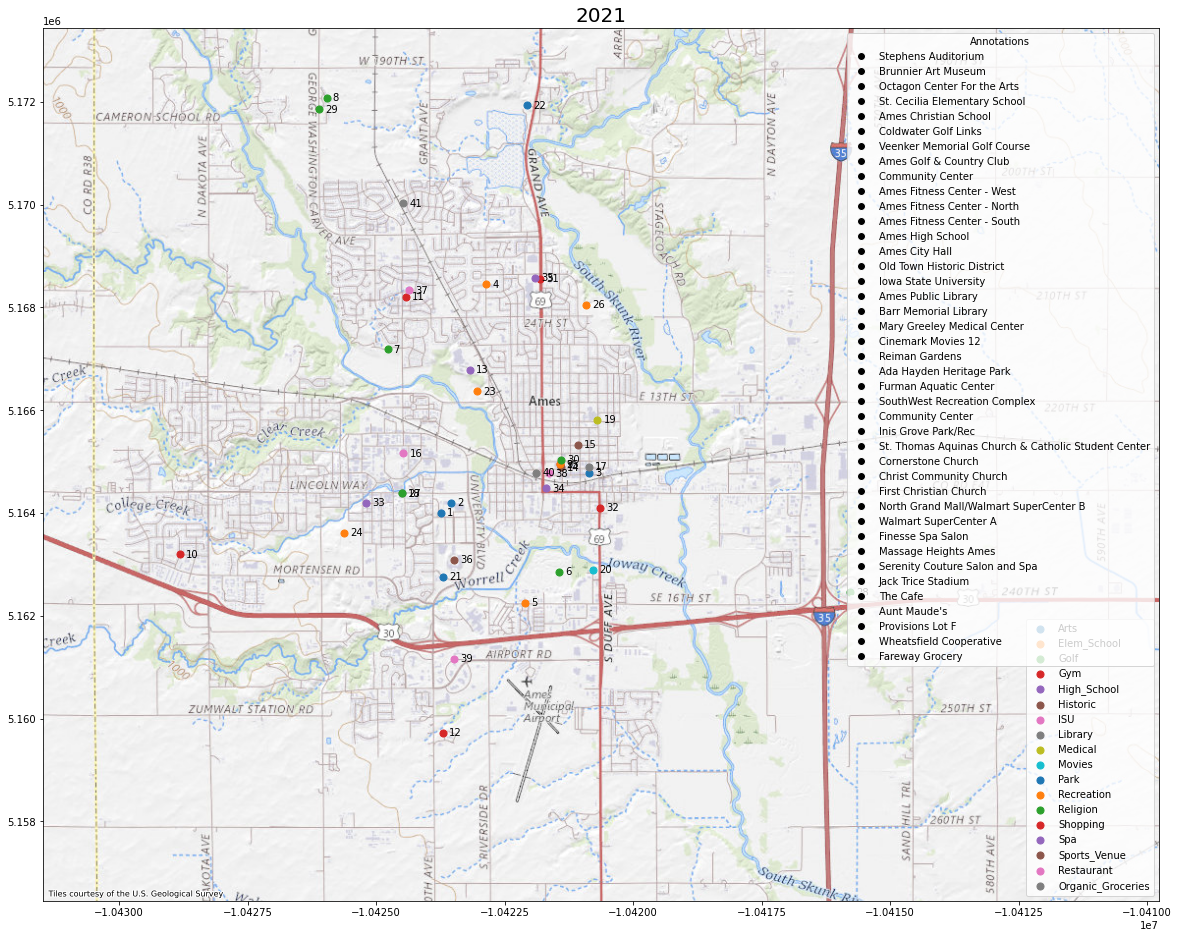

In [117]:
ax = df_wm.query("index > 0").plot(figsize = (20,20), alpha = 0)
for service in df_wm_biz.Service.unique():
    df_wm_biz.query(f"Service == '{service}'").plot(ax = ax, markersize = 50, marker = "o", label = service)

handles_nums = []

for row in df_wm_biz.iterrows():
    #print(row[1].Service, row[1].geometry)
    handles_nums.append(ax.annotate(row[1].biz_num, xy = (row[1].geometry.x, row[1].geometry.y), xytext = (6,-3), textcoords = "offset points"))
#df_wm_biz.query("Service == 'Gym'").plot(ax = ax, markersize = 50, color = "blue", marker = "o", label = "Gym")
cx.add_basemap(ax = ax, source = cx.providers.USGS.USTopo)
#plt.axis("off")
#plt.xlim((-1.0425e7, -1.04175e7))
#plt.ylim((5.162e6, 5.168e6))
plt.title(year, fontdict = {"fontsize":"20"})
legend1 = plt.legend(loc = "lower right")
plt.gca().add_artist(legend1)


legend2_elements = []
for text in df_wm_biz.Name:
    legend2_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor="black", markersize=8, label=text))
plt.legend(handles=legend2_elements, title='Annotations', loc='upper right')

#handles_name, = plt.plot(df_wm_biz.geometry.x, df_wm_biz.geometry.y, alpha = 0)
#legend2 = plt.legend(labels = df_wm_biz.Name)

plt.show()

In [165]:
for row in df_wm_biz.iterrows():
    print(row[1].Service, row[1].geometry)
    #ax.annotate(service, xy = (df_wm_biz.geometry.x, df_wm_biz.geometry.y))

Arts POINT (-10423736.5015757 5164005.599215714)
Arts POINT (-10423545.13557866 5164197.092648083)
Arts POINT (-10420861.305032058 5164787.362271849)
Elem_School POINT (-10422856.502076663 5168445.01238308)
Elem_School POINT (-10422108.146781052 5162246.799768416)
Golf POINT (-10421447.730543582 5162852.620228477)
Golf POINT (-10424776.85234844 5167186.804309941)
Golf POINT (-10425965.688850367 5172076.212493404)
Gym POINT (-10421417.058684284 5164945.364719272)
Gym POINT (-10428820.59296403 5163195.805632814)
Gym POINT (-10424413.230571348 5168203.189980591)
Gym POINT (-10423702.02147662 5159728.720122781)
High_School POINT (-10423173.183764072 5166785.8346012775)
Historic POINT (-10421398.429367498 5164889.279215017)
Historic POINT (-10421069.174143607 5165326.53640378)
ISU POINT (-10424470.631353581 5165160.32724347)
Library POINT (-10420864.576711891 5164903.254853791)
Library POINT (-10424494.809946982 5164380.101001451)
Medical POINT (-10420696.608958624 5165811.724346088)
Movies